# Music and the Brain 
---
__Anatomical image__ <br>
- sub-01_ses-01_T1 <br>
_"EchoTime"_ -> TE = 0.0035, <br>
_"RepetitionTime"_ -> TR = 2.53, <br>
<br>
- sub-01_ses-01_T2 <br>
_"EchoTime"_ -> TE = 0.408,, <br>
_"RepetitionTime"_ -> TR = 3.2, <br>


### Importing packages

In [26]:
import os #to read the directories

import numpy as np
import pandas as pd

import nibabel as nib

import nilearn
from nilearn import plotting
from nilearn import image
from nilearn.plotting import plot_anat, plot_img, plot_stat_map


In [189]:
# Set the path to the data directory
src_dir = "..\data"
part_id = 'sub-10'
ses_id = 'ses-01'
print(os.getcwd())


c:\Users\sebas\OneDrive\Documentos\GitHub\MusicBrainNetwork\scripts_seb


In [190]:
# Path to the T1w image
anat_path = os.path.join(src_dir, part_id, ses_id, 'anat')

anat_runs = os.listdir(anat_path) 

file_paths_anat = [f for f in anat_runs if f.endswith('nii.gz')]





In [191]:
print(anat_path)
print(file_paths_anat)

..\data\sub-10\ses-01\anat
['sub-10_ses-01_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', 'sub-10_ses-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz']


### 0.1 Anatomical Data

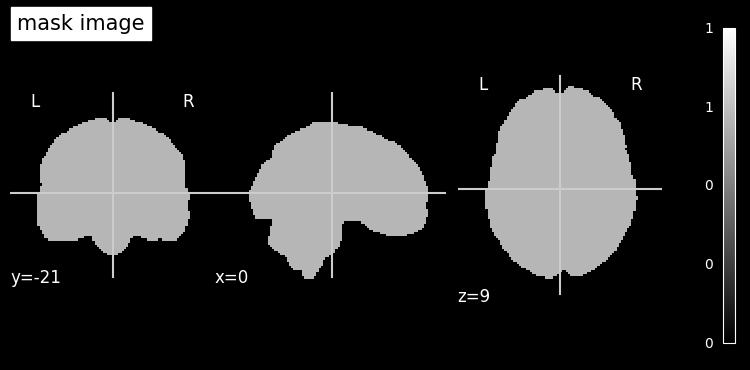

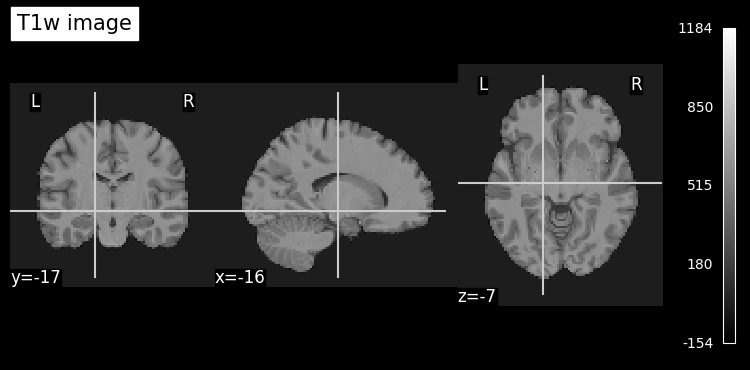

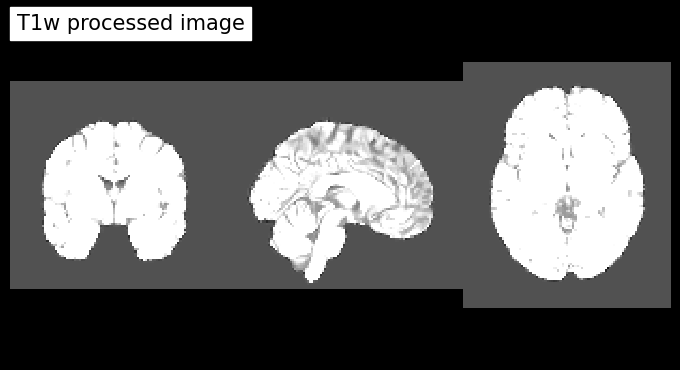

In [192]:
for file in file_paths_anat:
    try:
        image_info = file.split('_')[-1].split('.')[0] #Splits between the last _ and the .
        anat_img = os.path.join(anat_path,file)
        plot_anat(anat_img, title=image_info + " image", colorbar=True, cbar_tick_format="%i")
        
    except Exception as e:
        print(f"An error occurred while loading the file: {file}")
        print(f"Error: {str(e)}")

plot_anat(os.path.join(anat_path,file_paths_anat[1]), title='T1w processed image', display_mode='ortho', dim=-1, draw_cross=False, annotate=False, cut_coords=(0, 0, 0))
    

### 0.1 Functional Data
__Functional images__ <br>
_"RepetitionTime"_ -> TR = 1, <br>

In [193]:
from nilearn.image import concat_imgs, mean_img

In [194]:
funcdir_path = os.path.join(src_dir, part_id, ses_id, 'func')

func_runs = os.listdir(funcdir_path)

file_paths_func = [f for f in func_runs if f.endswith('bold.nii.gz')]

file_paths_func.sort()

In [195]:
print(func_runs)

['sub-10_ses-01_task-02a_run-1_events.tsv', 'sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.json', 'sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', 'sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.json', 'sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-10_ses-01_task-02a_run-2_events.tsv', 'sub-10_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.json', 'sub-10_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', 'sub-10_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.json', 'sub-10_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-10_ses-01_task-02a_run-3_events.tsv', 'sub-10_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.json', 'sub-10_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', 's

In [196]:
print(file_paths_func)

print((os.path.join(funcdir_path, file_paths_func[0])))


['sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-10_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-10_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-10_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz']
..\data\sub-10\ses-01\func\sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz


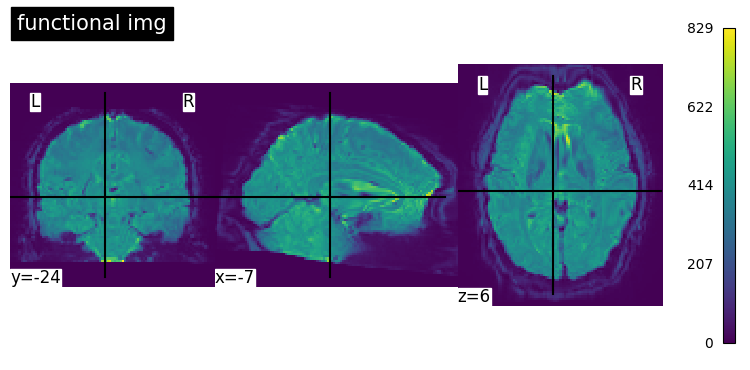

In [197]:
func_image = image.load_img(os.path.join(funcdir_path, file_paths_func[0]))


mean_func_img = mean_img(func_image)

plot_img(mean_func_img, title="functional img", colorbar=True, cbar_tick_format="%i")

In [198]:
# Concatenate the functional images
# fmri_img = concat_imgs(file_paths_func)

subject01_runs = {}
for i, file in enumerate(file_paths_func, start=1):
    
    subject01_runs[i] = file
    
print(subject01_runs)  

{1: 'sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 2: 'sub-10_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 3: 'sub-10_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 4: 'sub-10_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'}


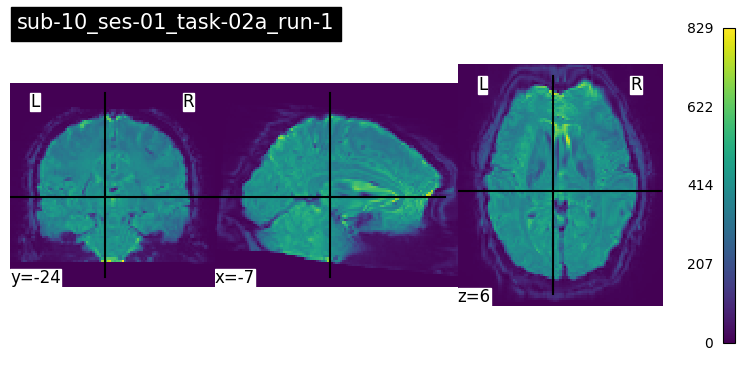

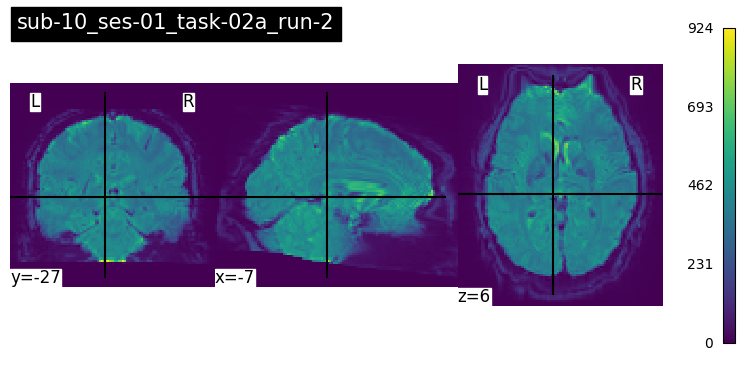

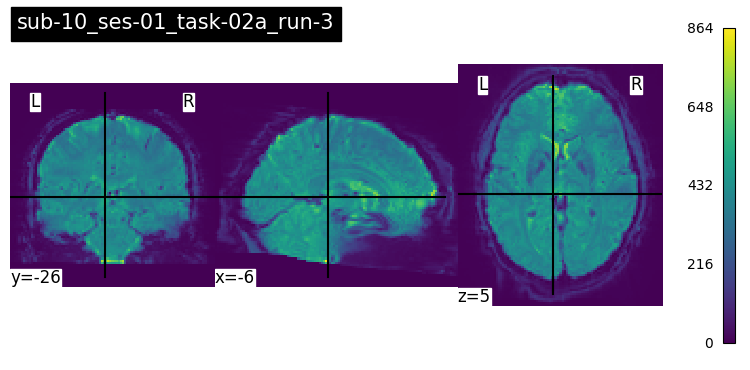

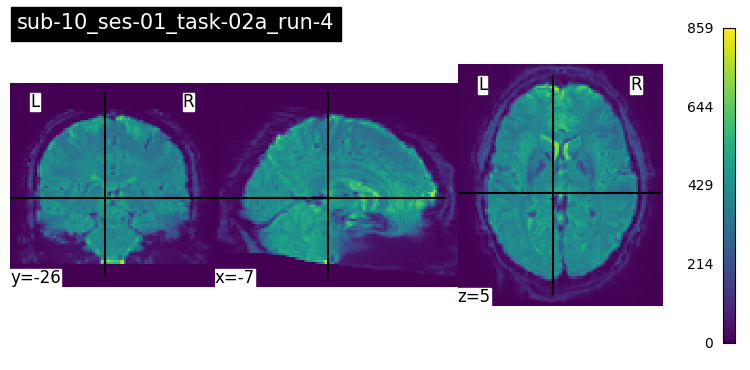

In [199]:
mean_fmri_imgs = {}

import gc

for i, (key, file_path) in enumerate(subject01_runs.items(), start=1):
    # Carregar a imagem funcional
    func_image = image.load_img(os.path.join(funcdir_path, file_path))

    # Extrair informações da imagem para o título
    image_info = '_'.join(os.path.basename(file_path).split('_')[:4])  # Extracts the first 4 parts of the archive's name 
    
    # Calcular a imagem média
    mean_fmri_img = mean_img(func_image)
    
    # Armazenar a imagem média no dicionário
    mean_fmri_imgs[key] = mean_fmri_img
    
    # Plotar a imagem média
    plot_img(mean_fmri_imgs[key], title=image_info, colorbar=True, cbar_tick_format="%i")
    
    # clenas up the memory
    del func_image
    del mean_fmri_img
    gc.collect()  

#### 0.2.1 Table of Events

In [200]:
fdir_events = [file for file in os.listdir(funcdir_path) if file.endswith('.tsv')]

f_events = [os.path.join(funcdir_path, f) for f in fdir_events]

f_events.sort()

f_events

['..\\data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-1_events.tsv',
 '..\\data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-2_events.tsv',
 '..\\data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-3_events.tsv',
 '..\\data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-4_events.tsv']

In [201]:
for fn in f_events:
    # Load the events.tsv file
    events = pd.read_table(fn)

    # Get the file name
    events_info = os.path.basename(fn)

    # Print the image information
    print(events_info) 
    
    # pd.read_table function is used to read a general delimited file into a pandas DataFrame
    print(events) 

sub-10_ses-01_task-02a_run-1_events.tsv
     onset  duration        trial_type
0     0.00     12.27   Noise_ToDiscard
1    12.27     23.96     Transcendence
2    36.23      6.00   Noise_InterSong
3    42.23     24.08     Transcendence
4    66.31     17.94             Noise
5    84.25     24.09  JoyfulActivation
6   108.35      5.90   Noise_InterSong
7   114.25     24.00  JoyfulActivation
8   138.25     17.99             Noise
9   156.23     24.18      Peacefulness
10  180.42      5.83   Noise_InterSong
11  186.25     24.11      Peacefulness
12  210.35     17.95             Noise
13  228.30     23.95         Nostalgia
14  252.25      5.99   Noise_InterSong
15  258.24     24.14         Nostalgia
16  282.38     17.87             Noise
17  300.25     24.06           Tension
18  324.31      5.99   Noise_InterSong
19  330.31     23.95           Tension
20  354.25     18.00             Noise
21  372.25     24.00           Sadness
22  396.26      6.00   Noise_InterSong
23  402.26     24.06    

# 1 Creation of Input dataset and Target vectors 

In [202]:
from nilearn.image import index_img 

run_id = 0
idx = 0

image_set = {}
target_set = {}
group_set = {}

offset_st = 4 # offset for the onset time
offset_end = 2 # offset for the end block time



# for each events file 
for fn in f_events:

    print(os.path.join(funcdir_path,file_paths_func[run_id]), fn)
    
    # Load the events.tsv file
    events = pd.read_table(fn)

    # create one image per event 
    for i, row in events.iterrows():

        # Print the row information
        print(row) 

        # Extract the onset time
        onset = np.round(row['onset'])

        # Extract the duration
        duration = np.round(row['duration'])

        # Extract the trial_type
        trial_type = row['trial_type']

        # Print the row information
        print(onset, duration, trial_type) 

        # if duration greater than 10
        if duration > 10 and onset + duration + offset_end < 660:

            # array with onset to onset+duration
            i_idxs = np.arange(onset + offset_st, onset + duration + offset_end, 1, dtype=int)

            # create mean_img based on i_idxs
            mean_img_i = mean_img(index_img( 
                os.path.join(funcdir_path,file_paths_func[run_id]), 
                i_idxs))

            image_set[idx] = mean_img_i
            target_set[idx] = trial_type
            group_set[idx] = run_id

            idx += 1


    run_id += 1


..\data\sub-10\ses-01\func\sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz ..\data\sub-10\ses-01\func\sub-10_ses-01_task-02a_run-1_events.tsv
onset                     0.0
duration                12.27
trial_type    Noise_ToDiscard
Name: 0, dtype: object
0.0 12.0 Noise_ToDiscard
onset                 12.27
duration              23.96
trial_type    Transcendence
Name: 1, dtype: object
12.0 24.0 Transcendence
onset                   36.23
duration                  6.0
trial_type    Noise_InterSong
Name: 2, dtype: object
36.0 6.0 Noise_InterSong
onset                 42.23
duration              24.08
trial_type    Transcendence
Name: 3, dtype: object
42.0 24.0 Transcendence
onset         66.31
duration      17.94
trial_type    Noise
Name: 4, dtype: object
66.0 18.0 Noise
onset                    84.25
duration                 24.09
trial_type    JoyfulActivation
Name: 5, dtype: object
84.0 24.0 JoyfulActivation
onset                  108.35
duration  

In [203]:
# size/shape of the image_set
print('Image set size: '+ str(len(image_set)))

# size/shape of the target_set
print('Target vector: '+ str(len(target_set)))

# print unique values in target_set
print('Labels: ')  
print(np.unique(list(target_set.values())))


# size/shape of the group_set
print('Run group vector: '+ str(len(group_set)))

Image set size: 108
Target vector: 108
Labels: 
['JoyfulActivation' 'Noise' 'Noise_ToDiscard' 'Nostalgia' 'Peacefulness'
 'Power' 'Sadness' 'Tenderness' 'Tension' 'Transcendence' 'Wonder']
Run group vector: 108


In [204]:
# Remove the noise condition 

# create a new image_set, target_set and group_set
image_set_clean = {}
target_set_clean = {}
group_set_clean = {}

idx = 0

# for each image in image_set

for i in image_set:

    # if the target is not 'noise'
    if target_set[i] != 'Noise':
        image_set_clean[idx] = image_set[i]
        target_set_clean[idx] = target_set[i]
        group_set_clean[idx] = group_set[i]
        idx += 1

# size/shape of the image_set_clean
print('Image set size: '+ str(len(image_set_clean)))

# size/shape of the target_set_clean
print('Target vector: '+ str(len(target_set_clean)))


Image set size: 76
Target vector: 76


In [205]:
deriv_dir = os.path.join(src_dir, 'derivatives')
print(deriv_dir)

if not os.path.exists(deriv_dir):
    os.makedirs(deriv_dir)

# if the directory for the participant and session does not exist, create it
if not os.path.exists(os.path.join(deriv_dir, part_id, ses_id)):
    os.makedirs(os.path.join(deriv_dir, part_id, ses_id))


# package folder structure
results_dir = os.path.join(deriv_dir, 'nilearn')
print(results_dir)

if not os.path.exists(results_dir):
    os.makedirs(results_dir)


data_fldr= os.path.join(results_dir, part_id, ses_id)
print(data_fldr)

# if the directory for the participant and session does not exist, create it
if not os.path.exists(data_fldr):
    os.makedirs(data_fldr)

# concat images in list

#if 
X = nilearn.image.concat_imgs(list(image_set.values()))


# Save the image_set using nibabel.save and BIDS naming convention
nib.save(X, os.path.join(deriv_dir, part_id, ses_id, f'{part_id}_{ses_id}_task-02a_MVPA_12sBOLD.nii.gz'))

# Save the target_set using np.save
np.save(os.path.join(deriv_dir, part_id, ses_id, f'{part_id}_{ses_id}_task-02a_MVPA_12sBOLD_targets.npy'), target_set)

# Save the group_set using np.save
np.save(os.path.join(deriv_dir, part_id, ses_id, f'{part_id}_{ses_id}_task-02a_MVPA_12sBOLD_groups.npy'), group_set)



..\data\derivatives
..\data\derivatives\nilearn
..\data\derivatives\nilearn\sub-10\ses-01


In [206]:
X_clean = nilearn.image.concat_imgs(list(image_set_clean.values()))


# Save the image_set using nibabel.save and BIDS naming convention
nib.save(X_clean, os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_clean.nii.gz'))

# Save the target_set to csv using pandas
pd.Series(target_set_clean, name = 'target').to_csv(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_targets_clean.csv'))

# Save the group_set to csv using pandas
pd.Series(group_set_clean, name = 'group').to_csv(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_groups_clean.csv'))



In [ ]:
results_dir = '../results_seb'

# package folder structure
results_dir = os.path.join(deriv_dir, 'fc_mvpa')
print(results_dir)

if not os.path.exists(results_dir):
    os.makedirs(results_dir)


data_fldr= os.path.join(results_dir, part_id, ses_id)
print(data_fldr)

# if the directory for the participant and session does not exist, create it
if not os.path.exists(data_fldr):
    os.makedirs(data_fldr)

print(os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_clean.nii.gz'))

..\data\derivatives
..\data\derivatives\nilearn
..\data\derivatives\nilearn\sub-10\ses-01
..\data\derivatives\nilearn\sub-10\ses-01\sub-10_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz


## Masking the runs

In [208]:
c_func_runs = [os.path.join(funcdir_path, f) for f in file_paths_func]
print(c_func_runs)

['..\\data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-10\\ses-01\\func\\sub-10_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz']


In [209]:
# Masking the data
from nilearn.masking import compute_epi_mask, compute_multi_epi_mask

mask_img = compute_multi_epi_mask(c_func_runs)

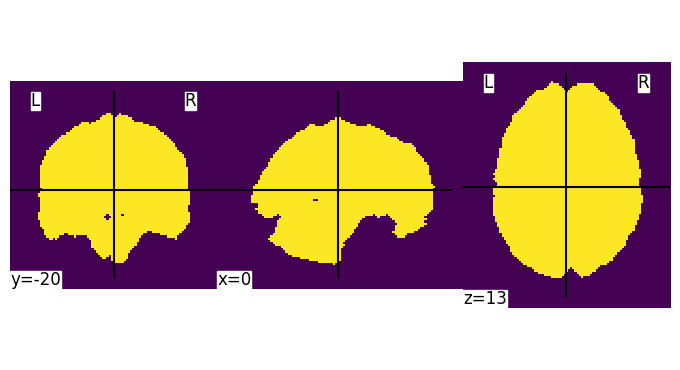

In [210]:
# plot mask image
plot_img(mask_img)

In [211]:
#save mask image
nib.save(mask_img, os.path.join(data_fldr, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_mask.nii.gz'))